In [1]:
%pip install mplfinance

Note: you may need to restart the kernel to use updated packages.


# Importar módulos

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import warnings
warnings.filterwarnings("ignore")

![S&P's 500](https://www.thestreet.com/.image/ar_16:9%2Cc_fill%2Ccs_srgb%2Cq_auto:good%2Cw_1200/MTg4MjU0NjUxODAyNzIzMzc2/sp-500-1.png)

<font size="3">``
- **O que é**: Índice de mercado que mede o desempenho de 500 grandes empresas dos EUA.
- **Composição**: Inclui empresas listadas nas bolsas NYSE e NASDAQ.
- **Origem**: Criado pela Standard & Poor's.
- **Critérios de seleção**: Capitalização de mercado, liquidez e representatividade no mercado.
- **Setores**: Empresas de vários setores, como tecnologia, saúde, finanças e energia.
- **Importância**: Principal indicador da saúde do mercado de ações americano.
- **Uso**: Referência para investidores, analistas e gestores de fundos.``<font size>

## Objetivos

Neste trabalho, vamos explorar os seguintes aspectos dos dados:

1. **Análise Descritiva Geral**:
   - Estatísticas descritivas para variáveis como preço das ações, capitalização de mercado, crescimento de receita e outros indicadores financeiros.
   
2. **Análise por Setor**:
   - Comparação dos setores presentes no S&P 500, incluindo distribuições de capitalização de mercado, volume negociado, e preços das ações.
   
3. **Análise Temporal**:
   - Visualização da evolução do volume de negociação e dos preços das ações ao longo do tempo.

4. **Correlação e Padrões**:
   - Identificação de correlações entre diferentes variáveis financeiras e comportamentais, como preço das ações e volume negociado.


In [30]:
df_companies = pd.read_csv(r'data/sp500_companies.csv', delimiter = ',')
df_index = pd.read_csv(r'data/sp500_index.csv', delimiter = ',')
df_stocks = pd.read_csv(r'data/sp500_stocks.csv', delimiter = ',')

In [4]:
# Verificando as colunas
df_companies.columns

Index(['Exchange', 'Symbol', 'Shortname', 'Longname', 'Sector', 'Industry',
       'Currentprice', 'Marketcap', 'Ebitda', 'Revenuegrowth', 'City', 'State',
       'Country', 'Fulltimeemployees', 'Longbusinesssummary', 'Weight'],
      dtype='object')

| Coluna | Features | Descrição |
|:---|:---|:---|
| 0 | Exchange | Bolsa onde as ações são negociadas |
| 1 | Symbol | Simbolo das ações |
| 2 | Shortname | Nome Abreviado da Empresa |
| 3 | Longname | Nome completo da empresa |
| 4 | Sector |Setor onde a empresa atua|
| 5 | Industry | Ramo de atuação |
| 6 | Currentprice | Preço atual das ações |
| 7 | Marketcap | Capitalização de mercado (Valor de mercado = Preço da Ação x Número total de ações) |
| 8 | Ebitda | Métrica financeira que representa o lucro de uma empresa antes de descontar os juros, impostos, depreciação e amortização $EBITDA\: = \:Lucro Operacional + Depreciação +  Amortização$ |
| 9 | Revenuegrowth | aumento percentual da receita $\dfrac {Receita\:no\:Período\:Atual - Receita\:no \:Período\:Anterior}{Receita\:no\:Período\:Anterior}$ |
| 10 | City | Cidade Matriz |
| 11 | State | Estado da Matriz |
| 12 | Country | País da Matriz |
| 13 | Fulltimeemployees | Número de Funcionários em tempo integral |
| 14 | Longbusinesssummary | Resumo da Empresa |
| 15 | Weight | Proporção do valor de mercado de uma empresa em relação ao valor de mercado total do índice S&P 500 |


In [5]:
df_companies.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,222.77,3387017396224,1.317810e+11,0.049,Cupertino,CA,United States,161000.0,"Apple Inc. designs, manufactures, and markets ...",0.066001
1,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,409.44,3043383836672,1.294330e+11,0.152,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.059304
2,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,108.00,2649240109056,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.051624
3,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,157.36,1946401505280,1.154780e+11,0.136,Mountain View,CA,United States,179582.0,Alphabet Inc. offers various products and plat...,0.037928
4,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,158.61,1941307129856,1.154780e+11,0.136,Mountain View,CA,United States,179582.0,Alphabet Inc. offers various products and plat...,0.037829


In [6]:
df_companies.shape

(503, 16)

In [45]:
df_index.head()

,Date,S&P500
0,2014-09-02,2002.28
1,2014-09-03,2000.72
2,2014-09-04,1997.65
3,2014-09-05,2007.71
4,2014-09-08,2001.54


In [7]:
df_index.shape

(2517, 2)

In [46]:
df_stocks.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,44.016727,69.414719,69.774246,69.122070,69.473244,3640265.0
1,2010-01-05,MMM,43.741028,68.979935,69.590302,68.311035,69.230766,3405012.0
2,2010-01-06,MMM,44.361355,69.958191,70.735786,69.824417,70.133781,6301126.0
3,2010-01-07,MMM,44.393166,70.008362,70.033447,68.662209,69.665550,5346240.0
4,2010-01-08,MMM,44.705975,70.501671,70.501671,69.648827,69.974915,4073337.0


In [8]:
df_stocks.shape

(1856573, 8)

In [9]:
df_companies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Exchange             503 non-null    object 
 1   Symbol               503 non-null    object 
 2   Shortname            503 non-null    object 
 3   Longname             503 non-null    object 
 4   Sector               503 non-null    object 
 5   Industry             503 non-null    object 
 6   Currentprice         503 non-null    float64
 7   Marketcap            503 non-null    int64  
 8   Ebitda               474 non-null    float64
 9   Revenuegrowth        501 non-null    float64
 10  City                 503 non-null    object 
 11  State                484 non-null    object 
 12  Country              503 non-null    object 
 13  Fulltimeemployees    495 non-null    float64
 14  Longbusinesssummary  503 non-null    object 
 15  Weight               503 non-null    flo

In [10]:
# Verificação de valores nulos
porcentagem_nulos = (df_companies.isnull().sum() / df_companies.shape[0])*100
porcentagem_nulos

Exchange               0.000000
Symbol                 0.000000
Shortname              0.000000
Longname               0.000000
Sector                 0.000000
Industry               0.000000
Currentprice           0.000000
Marketcap              0.000000
Ebitda                 5.765408
Revenuegrowth          0.397614
City                   0.000000
State                  3.777336
Country                0.000000
Fulltimeemployees      1.590457
Longbusinesssummary    0.000000
Weight                 0.000000
dtype: float64

In [11]:
# Estatistica descritivas (Tentar melhorar as escalas)
df_companies.describe()

,Currentprice,Marketcap,Ebitda,Revenuegrowth,Fulltimeemployees,Weight
count,503.000000,5.030000e+02,4.740000e+02,501.000000,4.950000e+02,503.000000
mean,217.705368,1.020239e+11,6.793077e+09,0.057595,5.815373e+04,0.001988
std,490.623967,2.946485e+11,1.485538e+10,0.142049,1.394497e+05,0.005742
min,7.360000,6.283820e+09,-4.107000e+09,-0.573000,2.800000e+01,0.000122
25%,68.285000,1.920809e+10,1.585225e+09,-0.001000,1.007550e+04,0.000374
50%,122.060000,3.575006e+10,2.880500e+09,0.047000,2.124900e+04,0.000697
75%,233.045000,7.439036e+10,5.874562e+09,0.096000,5.354100e+04,0.001450
max,9053.670000,3.387017e+12,1.317810e+11,1.430000,2.100000e+06,0.066001


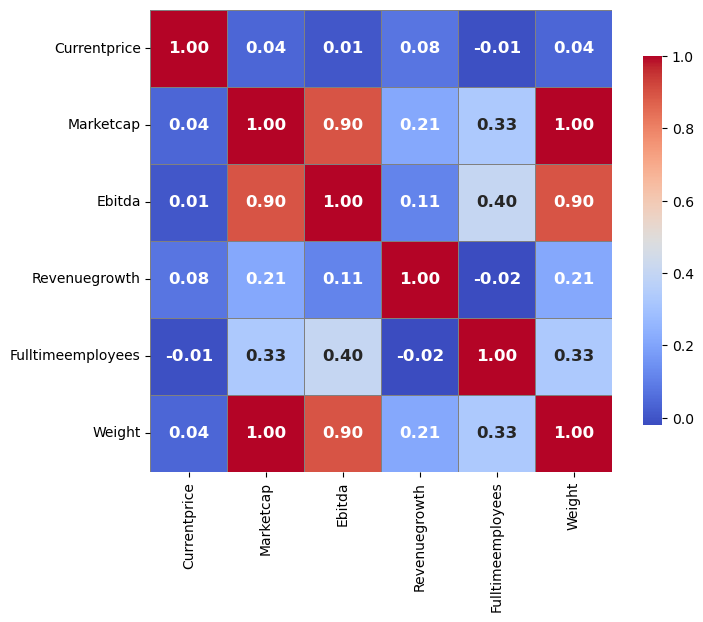

In [12]:
# Correlação 
colunas = ['Currentprice', 'Marketcap', 'Ebitda', 'Revenuegrowth', 'Fulltimeemployees', 'Weight']
df_correlation = df_companies[colunas]

# Calculando a correlação
correlacao = df_correlation.corr()

plt.figure(figsize = (8,6))
sns.heatmap(
    correlacao, 
    annot=True,                # Mostra os valores de correlação
    fmt=".2f",                
    cmap='coolwarm',           
    cbar_kws={'shrink': .8},   # Tamanho da barra de cores
    linewidths=0.5,            # Espessura das linhas entre as células
    linecolor='gray',          
    annot_kws={"size": 12, "weight": 'bold'}, 
    square=True                
)

plt.show()

Correlações fortes e positivas:

- Ebitida e Wight (Proporção do valor de mercado) - Ambos tendem a crescer juntos
- Ebitida e Marketcap (Valor total de mercado de uma empresa) - Ambos tendem a crescer juntos 

Valores ausentes:
 S&P500    0
dtype: int64


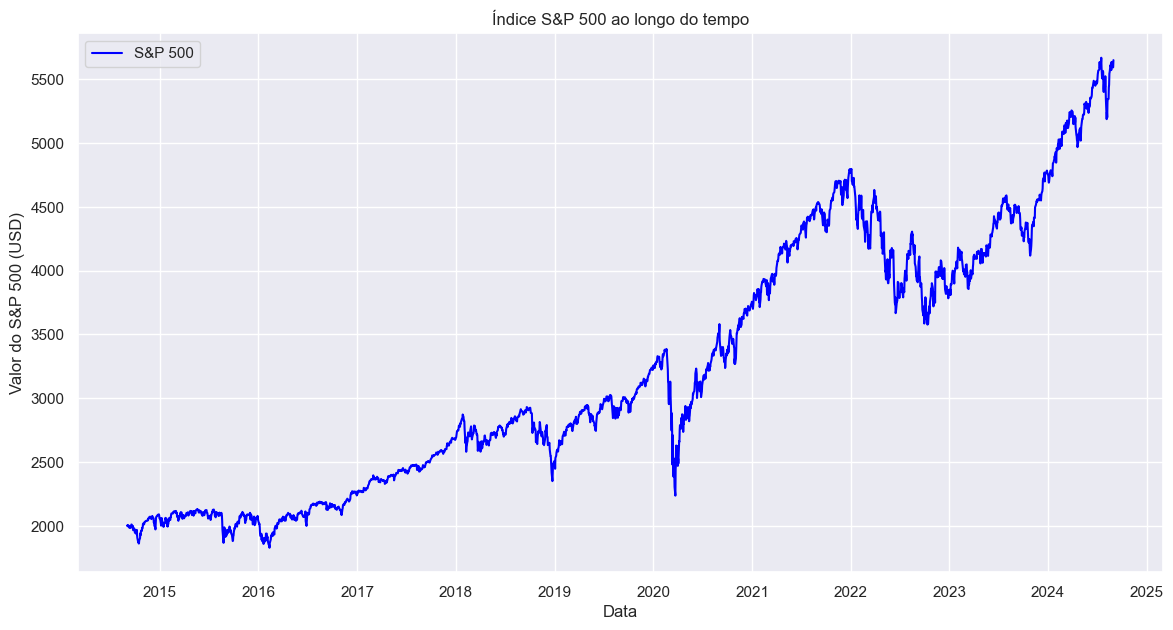

In [13]:
# Converter a coluna 'Date' para datetime (ajustando o formato para 'YYYY-MM-DD')
df_index['Date'] = pd.to_datetime(df_index['Date'], format='%Y-%m-%d')

# Definir a coluna 'Date' como índice e ordernar dados por data
df_index.set_index('Date', inplace=True)
df_index.sort_index(inplace=True)

# Verificar se há valores ausentes e preencher valores
print("Valores ausentes:\n", df_index.isna().sum())
df_index['S&P500'] = df_index['S&P500'].ffill()
# Gráfico variação temporal do índice S&P500
sns.set(style="dark")
plt.figure(figsize=(14, 7))
plt.plot(df_index.index, df_index['S&P500'], label='S&P 500', color='blue')
plt.title('Índice S&P 500 ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Valor do S&P 500 (USD)')
plt.legend()
plt.grid(True)
plt.show()

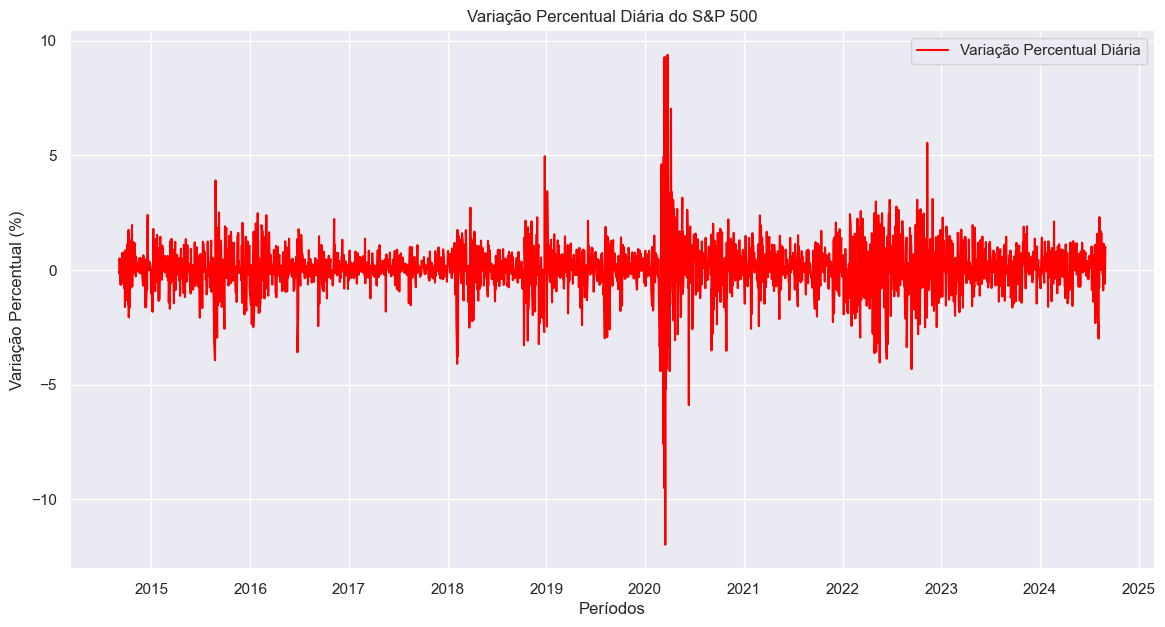

In [14]:
# Calcular a variação percentual diária
df_index['Daily Change'] = df_index['S&P500'].pct_change() * 100

# Gráfico da variação percentual diária
sns.set(style="dark")
plt.figure(figsize=(14, 7))
sns.lineplot(x=df_index.index, y=df_index['Daily Change'], color='red', label='Variação Percentual Diária')
plt.title('Variação Percentual Diária do S&P 500')
plt.xlabel('Períodos')
plt.ylabel('Variação Percentual (%)')
plt.legend()
plt.grid(True)
plt.show()

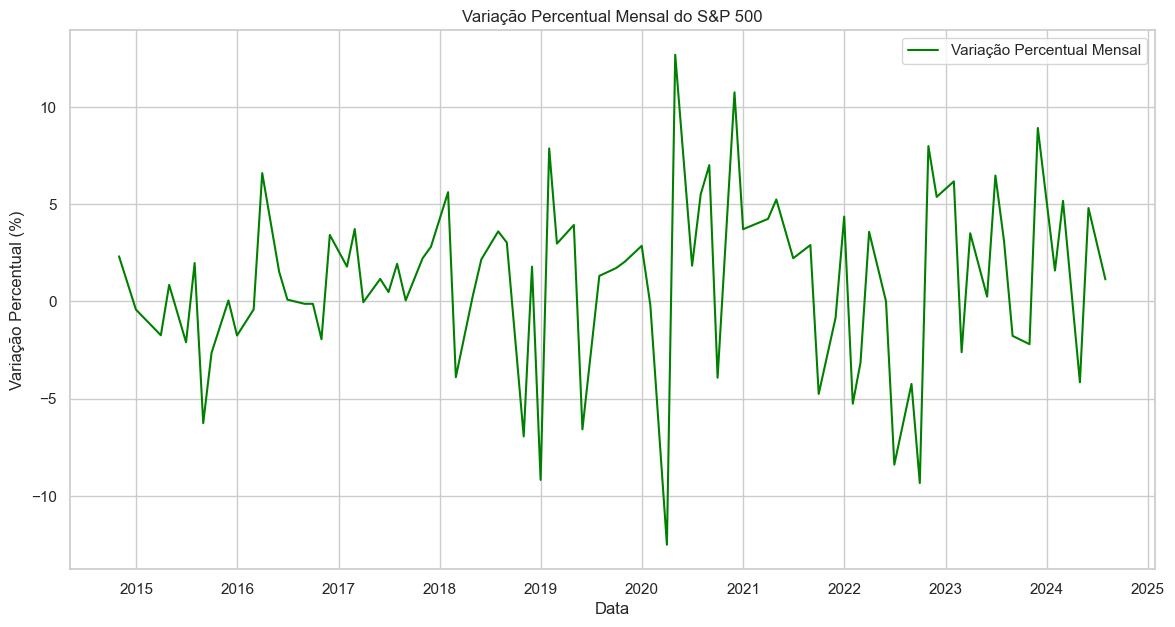

In [15]:
# variação percentual mensal
df_index['Monthly Change'] = df_index['S&P500'].resample('M').ffill().pct_change() * 100


# Gráfico da variação percentual mensal
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))
sns.lineplot(x=df_index.index, y=df_index['Monthly Change'], color='green', label='Variação Percentual Mensal')
plt.title('Variação Percentual Mensal do S&P 500')
plt.xlabel('Data')
plt.ylabel('Variação Percentual (%)')
plt.legend()
plt.grid(True)
plt.show()

## Volume total negociado

In [31]:
df_stocks.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,44.016727,69.414719,69.774246,69.122070,69.473244,3640265.0
1,2010-01-05,MMM,43.741028,68.979935,69.590302,68.311035,69.230766,3405012.0
2,2010-01-06,MMM,44.361355,69.958191,70.735786,69.824417,70.133781,6301126.0
3,2010-01-07,MMM,44.393166,70.008362,70.033447,68.662209,69.665550,5346240.0
4,2010-01-08,MMM,44.705975,70.501671,70.501671,69.648827,69.974915,4073337.0


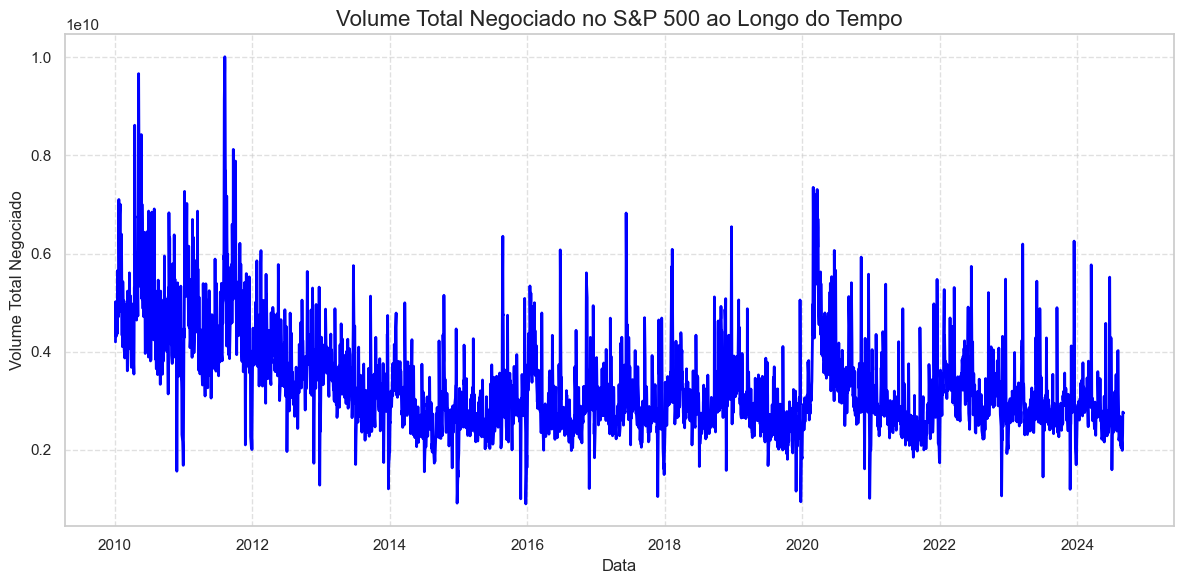

In [16]:
# Agrupando por data para somar o volume total negociado em todas as empresas
volume_by_date = df_stocks.groupby('Date')['Volume'].sum().reset_index()


plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(volume_by_date['Date']), volume_by_date['Volume'], color='blue', linewidth=2)
plt.title('Volume Total Negociado no S&P 500 ao Longo do Tempo', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Volume Total Negociado', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

O grafico mostra as variações na volumetria total de negociações. Podemos observar períodos de menor e maior atividade.

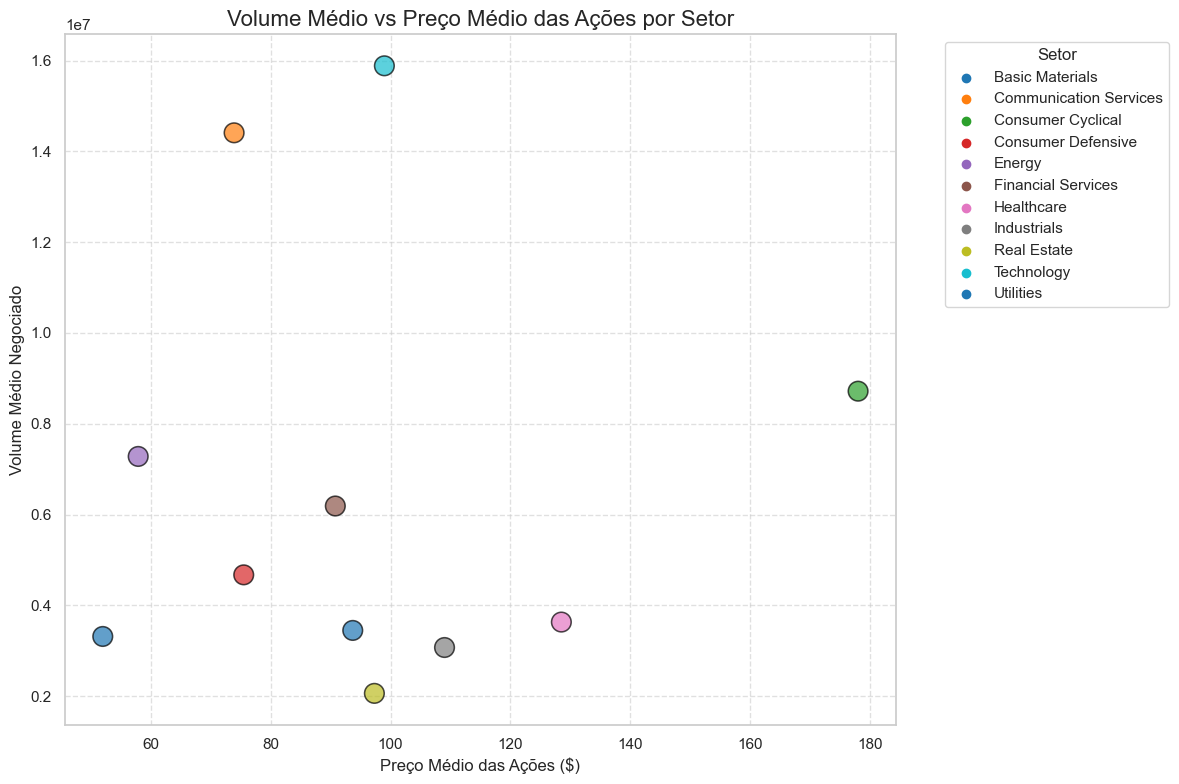

In [17]:
# Juntando os dados de empresas com os dados históricos de ações para adicionar o setor
merged_df = pd.merge(df_stocks, df_companies[['Symbol', 'Sector']], on='Symbol', how='left')

# volume médio e o preço médio por setor
sector_volume_price = merged_df.groupby('Sector').agg({
    'Volume': 'mean',  
    'Close': 'mean'    
}).reset_index()


# plotando...
plt.figure(figsize=(12, 8))
sns.scatterplot(data=sector_volume_price, x='Close', y='Volume', hue='Sector', palette='tab10', s=200, edgecolor='black', alpha=0.7)

plt.title('Volume Médio vs Preço Médio das Ações por Setor', fontsize=16)
plt.xlabel('Preço Médio das Ações ($)', fontsize=12)
plt.ylabel('Volume Médio Negociado', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)

plt.legend(title='Setor', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

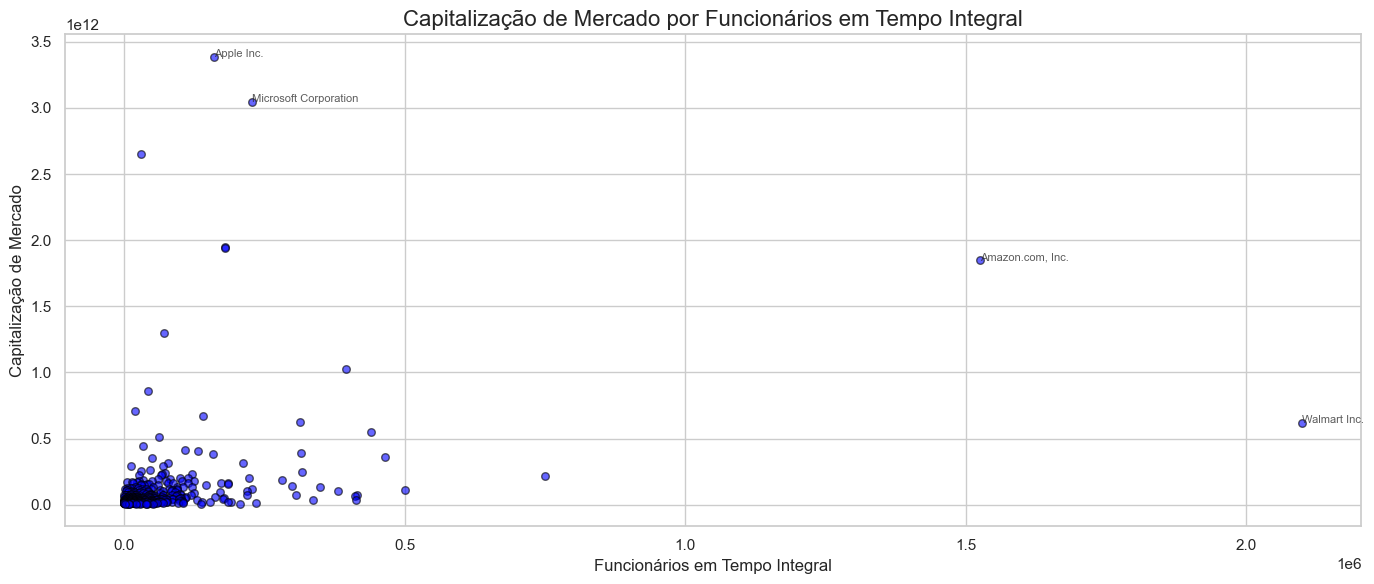

In [32]:
# Filtrar as empresas com dados de funcionários e capitalização de mercado
filtered_df = df_companies.dropna(subset=['Fulltimeemployees', 'Marketcap'])


# pensei depois que poderia ser interessante mostrar quais são as empresas com mais funcionários e maior capitalização de mercado
top_2_funcionarios = filtered_df.nlargest(2, 'Fulltimeemployees')
top_2_marketcap = filtered_df.nlargest(2, 'Marketcap')

# plotando...
fig, ax = plt.subplots(figsize=(14, 6))
sc = ax.scatter(
    filtered_df['Fulltimeemployees'], 
    filtered_df['Marketcap'], 
    c='blue', 
    s=30, 
    alpha=0.6, 
    edgecolor='black'
)

# aqui escreve o nome das empresas
for i, txt in top_2_funcionarios.iterrows():
    ax.annotate(txt['Shortname'], (txt['Fulltimeemployees'], txt['Marketcap']), fontsize=8, alpha=0.75)
for i, txt in top_2_marketcap.iterrows():
    ax.annotate(txt['Shortname'], (txt['Fulltimeemployees'], txt['Marketcap']), fontsize=8, alpha=0.75)


ax.set_title('Capitalização de Mercado por Funcionários em Tempo Integral', fontsize=16)
ax.set_xlabel('Funcionários em Tempo Integral', fontsize=12)
ax.set_ylabel('Capitalização de Mercado', fontsize=12)

plt.tight_layout()
plt.show()

A maioria das empresas possui menos de 0,5 milhão de funcionários em tempo integral e menos de 1 trilhão de capitalização de mercado. Walmart e Amazon são as duas empresas com o maior número de funcionários em tempo integral. Apple e Microsoft são as duas com a maior capitalização de mercado.

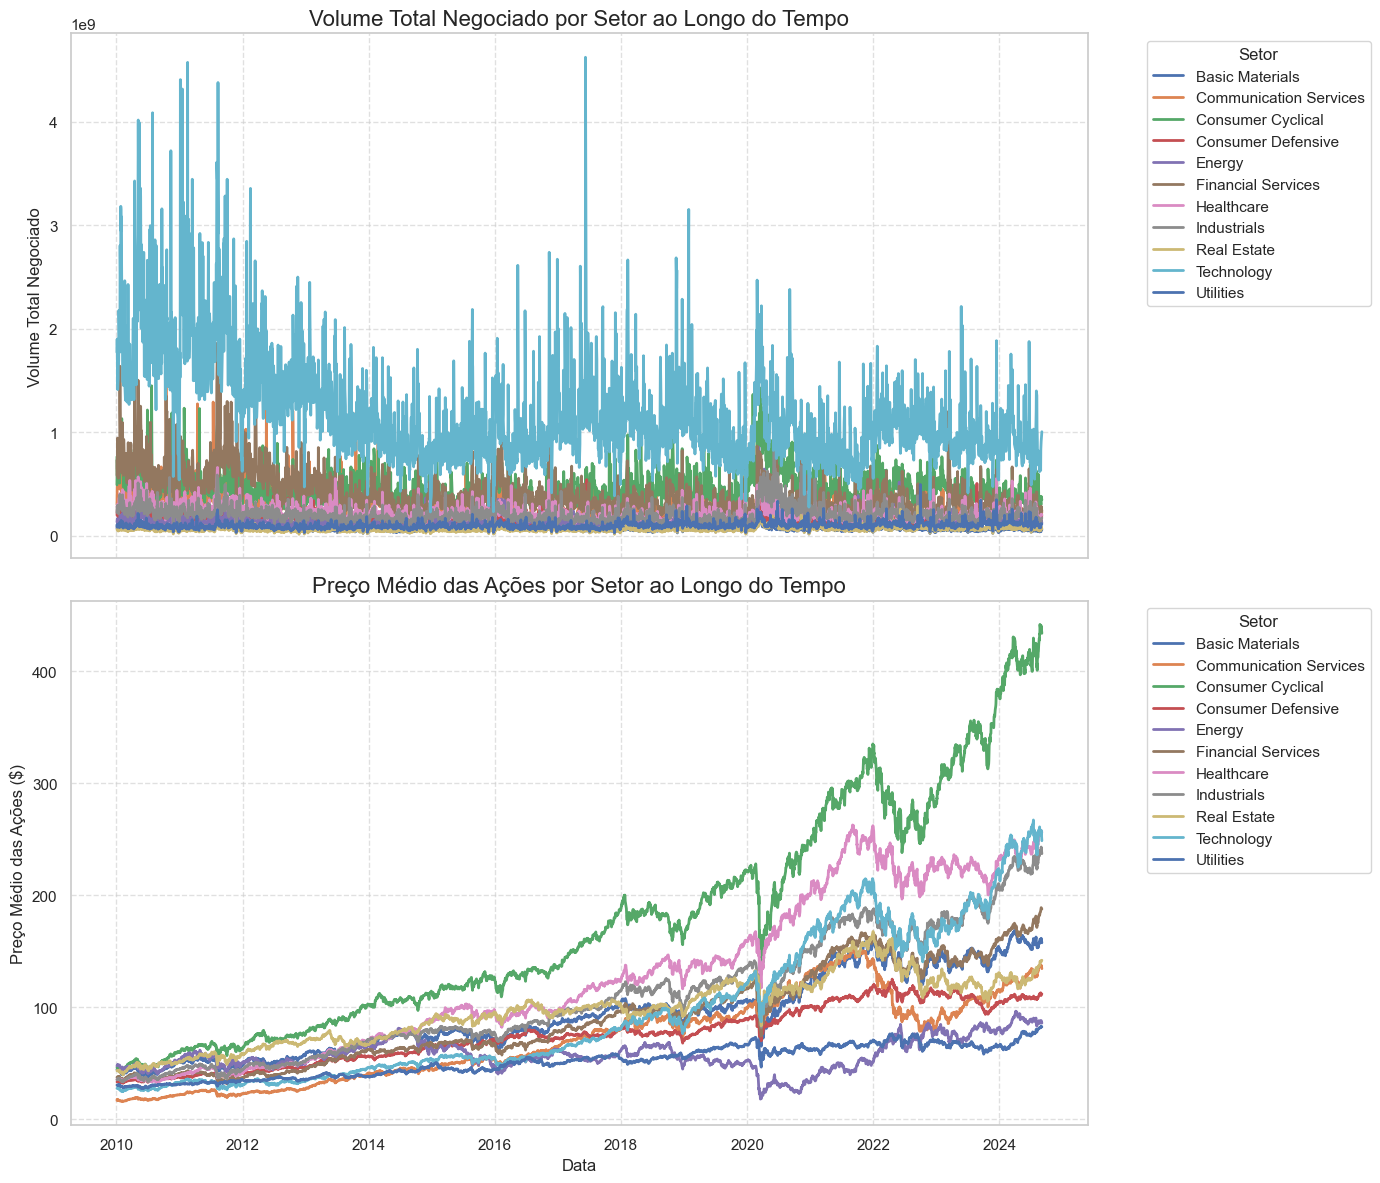

In [33]:
marged_df = pd.merge(df_stocks, df_companies [['Symbol', 'Sector']], on = 'Symbol', how = 'left')
sector_time_series = marged_df.groupby(['Date', 'Sector']).agg({
    'Volume' : 'sum',
    'Close' : 'mean'}).reset_index()
sector_time_series['Date'] = pd.to_datetime(sector_time_series['Date'])

sectors = sector_time_series['Sector'].unique() #obtém uma lista dos setores únicos presentes no DataFrame sector_time_series. Isso facilita a iteração para criar gráficos separados para cada setor.
fig, (ax1,ax2) = plt.subplots(2,1, figsize =(14,12), sharex = True)

for sector in sectors :
    sector_data = sector_time_series [sector_time_series['Sector'] == sector ]
    ax1.plot(sector_data['Date'], sector_data['Volume'], label = sector, linewidth =2 )

ax1.set_title('Volume Total Negociado por Setor ao Longo do Tempo', fontsize=16)
ax1.set_ylabel('Volume Total Negociado', fontsize=12)
ax1.legend(title='Setor', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, linestyle='--', alpha=0.6)


for sector in sectors:
    sector_data = sector_time_series[sector_time_series['Sector'] == sector]
    ax2.plot(sector_data['Date'], sector_data['Close'], label=sector, linewidth=2)
ax2.set_title('Preço Médio das Ações por Setor ao Longo do Tempo', fontsize=16)
ax2.set_xlabel('Data', fontsize=12)
ax2.set_ylabel('Preço Médio das Ações ($)', fontsize=12)
ax2.legend(title='Setor', bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

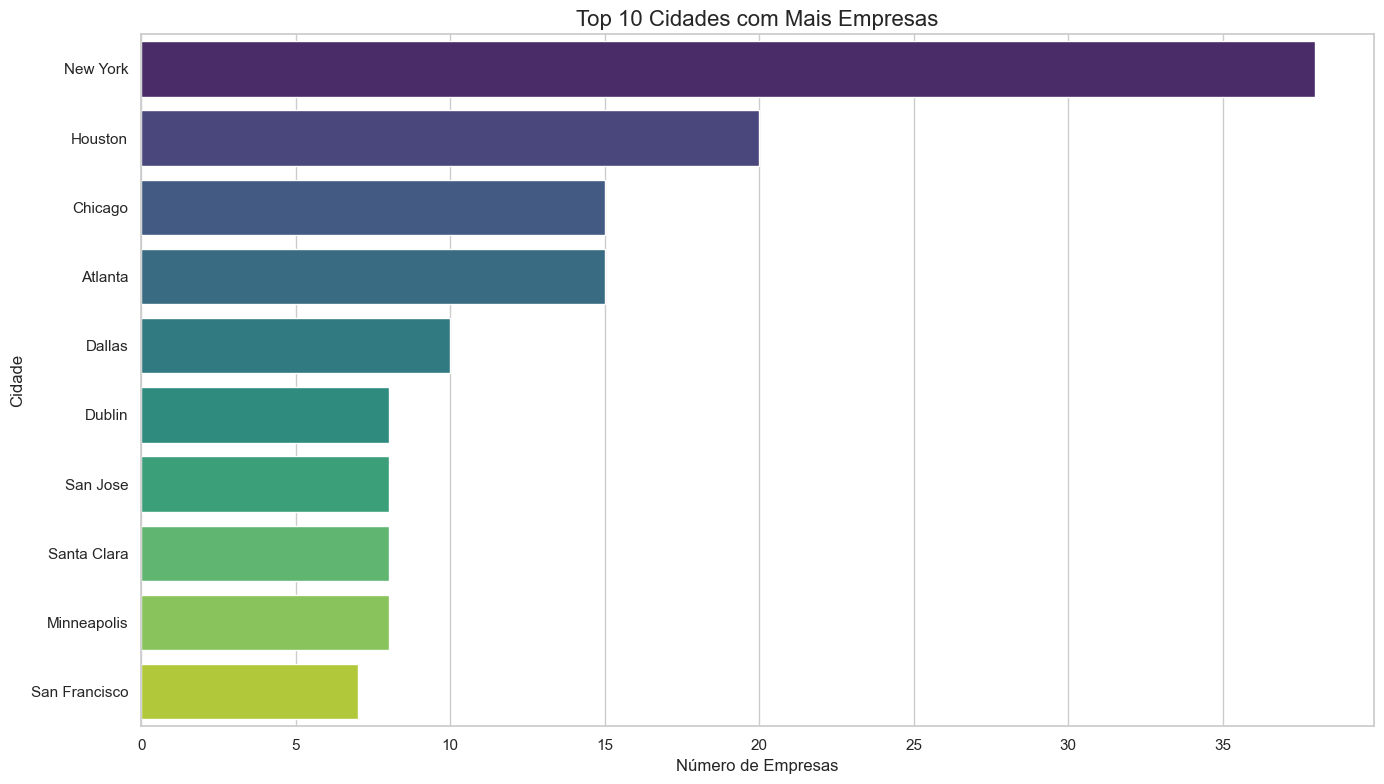

In [34]:
companies_by_city = df_companies['City'].value_counts().reset_index()
companies_by_city.columns = ['City', 'Number of Companies']

# Selecionar as 10 principais cidades
top_10_cities = companies_by_city.head(10)


plt.figure(figsize=(14, 8))
sns.barplot(x='Number of Companies', y='City', data=top_10_cities, palette='viridis')


plt.title('Top 10 Cidades com Mais Empresas', fontsize=16)
plt.xlabel('Número de Empresas', fontsize=12)
plt.ylabel('Cidade', fontsize=12)


plt.tight_layout()
plt.show()

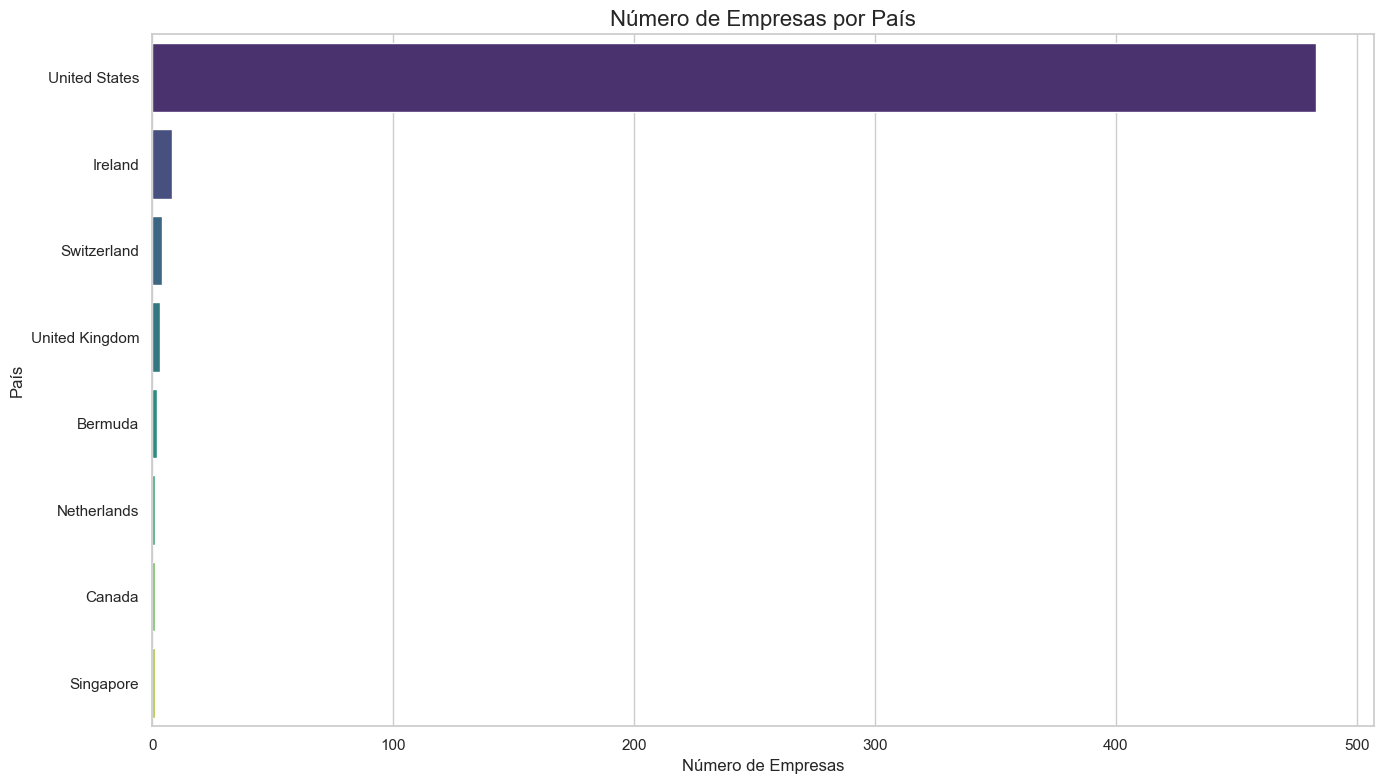

In [35]:
companies_by_country = df_companies['Country'].value_counts().reset_index()
companies_by_country.columns = ['Country', 'Number of Companies']

# Criar o gráfico de barras
plt.figure(figsize=(14, 8))
sns.barplot(x='Number of Companies', y='Country', data=companies_by_country, palette='viridis')

# Adicionar título e rótulos aos eixos
plt.title('Número de Empresas por País', fontsize=16)
plt.xlabel('Número de Empresas', fontsize=12)
plt.ylabel('País', fontsize=12)

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [36]:
# on df_stocks we will take the mean of the high and low prices to get the average price of the stock
df_stocks['average_price'] = (df_stocks['High'] + df_stocks['Low'])/2

#lets count the number of days that this database has
x = df_stocks['Date'].nunique()

#now we will make a metris of avera price of the stock and the volume of the stock normalized by the number of days
df_stocks['price_volume'] = df_stocks['average_price']*df_stocks['Volume']/x

In [37]:
#lets pick the top 10 companies with the highest price_volume
df_stocks = df_stocks.sort_values(by = 'price_volume', ascending = True)

#grouping the data by company
df_stocks = df_stocks.groupby('Symbol').sum()

#lets pick the top 10 companies by the price_volume
df_stocks = df_stocks.sort_values(by = 'price_volume', ascending = False)

#pciking the top 10 companies
df_stocks_top10 = df_stocks.head(10)

In [38]:
#now we join the data to get the company name
df_stocks_top10 = df_stocks_top10.join(df_companies.set_index('Symbol'), on = 'Symbol')

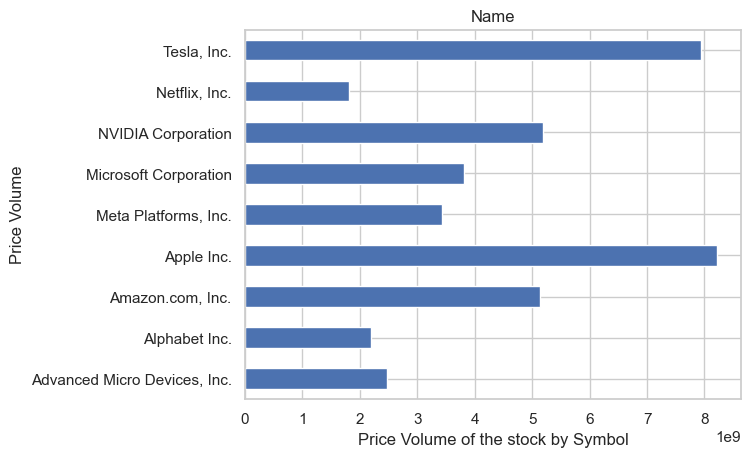

In [39]:
#now we graph the price volume of the stock by the Symbol of the company
df_stocks_top10.groupby('Shortname')['price_volume'].mean().plot(kind = 'barh')
plt.title('Name')
plt.xlabel('Price Volume of the stock by Symbol')
plt.ylabel('Price Volume')
plt.show()

In [42]:
df_stocks = pd.read_csv(r'data/sp500_stocks.csv', delimiter = ',')

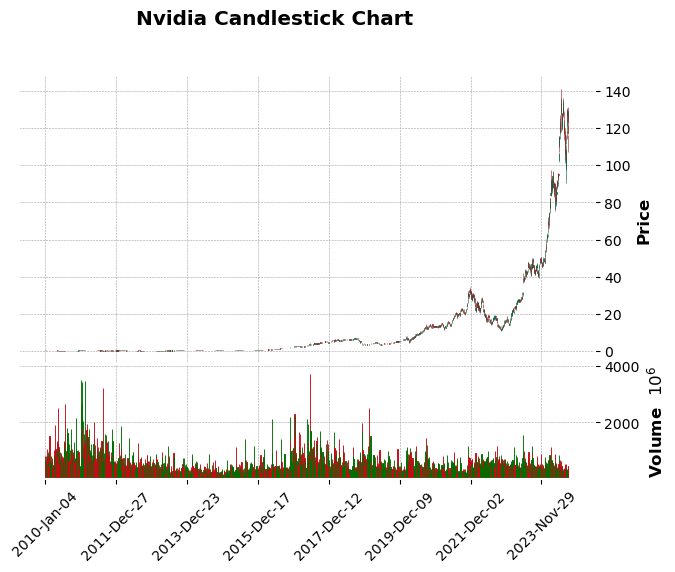

In [43]:
nvidia_df = df_stocks[df_stocks['Symbol'] == 'NVDA']

# Set the 'Date' column as the index
nvidia_df['Date'] = pd.to_datetime(nvidia_df['Date'])
nvidia_df.set_index('Date', inplace=True)
#will plot the candle stick graph of the nvidia stock'
mpf.plot(nvidia_df, type='candle', volume=True, title='Nvidia Candlestick Chart', style='charles')

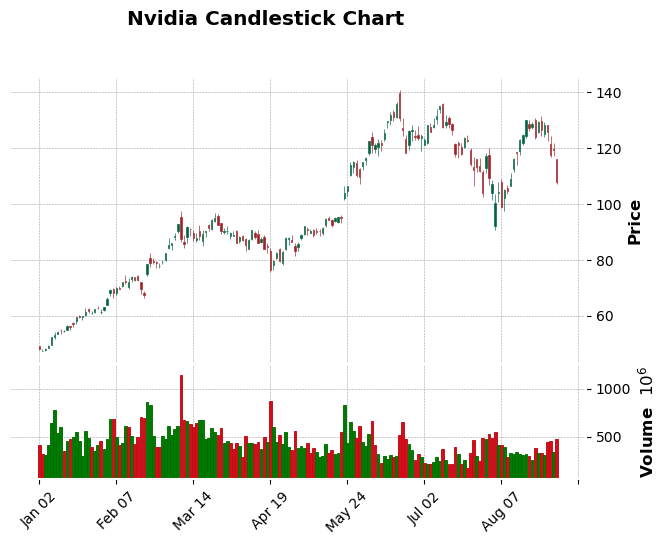

In [44]:
nvidia_df = nvidia_df.loc['2024':]

#Now we make the time frame of the graph smaller to see the candle stick graph better'
mpf.plot(nvidia_df, type='candle', volume=True, title='Nvidia Candlestick Chart', style='charles')

### Principais Conclusões:

1. **Análise Geral e Setorial**:
   - Observamos variações significativas nos preços das ações e na capitalização de mercado entre os diferentes setores da economia. Setores como **Tecnologia**, **Serviços de Comunicação** e **Saúde** apresentaram as maiores valorizações de mercado, enquanto setores como **Energia** e **Materiais Básicos** mostraram uma volatilidade maior nos preços das ações.
   
2. **Volume Negociado**:
   - A análise de volumetria destacou padrões de negociação ao longo do tempo, com certos setores e empresas apresentando volumes significativamente mais altos em momentos específicos. Isso pode estar relacionado a eventos de mercado, resultados financeiros, ou notícias que impactaram os investidores.

3. **Correlação entre Indicadores**:
   - Foi possível identificar correlações entre variáveis como **preço das ações** e **volume negociado**, além de explorar o impacto do crescimento de receita em diferentes setores. Esses padrões sugerem que setores mais valorizados tendem a manter volumes de negociação elevados e consistentes ao longo do tempo.

4. **Evolução Temporal**:
   - A análise da evolução temporal dos preços e volumes demonstrou que o mercado de ações apresenta ciclos claros de alta e baixa, refletindo momentos de crescimento econômico e crises. Empresas líderes de mercado como **Apple**, **Microsoft**, e **NVIDIA** foram destaques tanto em termos de crescimento quanto de consistência em suas performances.
